Stáhni si data ze souboru Life-Expectancy-Data-Updated.csv, která udávají průměrnou dobu života v jednotlivých zemích světa. Data pocházejí od Světové zdravotnické organizace (WHO) a Světové banky. Vytvoř regresní model, jehož úkolem bude zjistit, které faktory ovlivňují průměrnou délku života.

https://github.com/pesikj/PythonProDataScience/blob/c2c439db2b0ce9790f3ef4fe7ab989bf738b420f/domaci_ukoly/soubory_03/Life-Expectancy-Data-Updated.csv

- Vyber data pro jeden konkrétní rok (např. pro rok 2015).
- Vysvětlovanou proměnnou ve tvém modelu bude Life expectancy, což je průměrná délka života.
- Délku dožití určitě bude ovlivňovat bohatství země, které lze vyjádřit ve hrubém domácím produktu na hlavu. Začni s modelem, který má jako vysvětlující proměnnou sloupec GDP_per_capita (hrubý domácí produkt na hlavu v dolarech). Zobraz výsledek jako graf. Dále si zobraz tabulku s využitím metody využitím modulu scipy a metody summary() a zjisti koeficient determinace.

Do modelu přidej následující sloupce:

- Schooling - průměrná délka studia (v letech),
- Incidents_HIV - nákazy virem HIV (počet případů na osobu)
- Diphtheria - procento populace očkované proti záškrtu,
- Polio - procento populace očkované proti dětské obrně,
- BMI - průměrný BMI index populace,
- Measles - procento populace očkované proti spalničkám.
U každého sloupce se zamysli nad tím, jestli může délku života výrazně ovlivnit a jaké tipuješ znaménko koeficientu (kladné - zvyšuje délku života, záporné - snižuje délku života).

Sestav model z vybraných sloupců a proveď následující kroky:

- Formuluj hypotézu o normalitě reziduí a otestuj ji s využitím modulu scipy a metody summary(). Jaký je výsledek - mají rezidua normální rozdělení?
- Jaký je koeficient determinace výsledného modelu. Porovnej ho s koeficientem determinace, který vyšel z modelu, kde byl pouze hrubý domácí produkt. Jak se změnil? A co to znamená?
- Pokud jsi nezamítl(a) hypotézu normality, podívej se do sloupce P>|t| a vyber řádek s nejvyšší p-hodnotou. Koeficient pro daný řádek odeber z modelu. Jak se změnila hodnota ostatních koeficientů? Jak se změnil koeficient determinace?
#### Hypotézy a odpovědi na otázky, které jsou součástí zadání, prosím piš jako text v Jupyter notebooku nebo jako komentář ke zdrojovému kódu. Komentáře stačí stručné, nechceme článek, ale jde jen o to, abychom věděli, že je látka jasná.

Vyber data pro jeden konkrétní rok (např. pro rok 2015).

In [6]:
import pandas
import numpy

data = pandas.read_csv("ukol_03-Life-Expectancy-Data-Updated.csv")

data2015 = data[data["Year"] == 2015]



Vysvětlovanou proměnnou ve tvém modelu bude Life expectancy, což je průměrná délka života.
Délku dožití určitě bude ovlivňovat bohatství země, které lze vyjádřit ve hrubém domácím produktu na hlavu. Začni s modelem, který má jako vysvětlující proměnnou sloupec GDP_per_capita (hrubý domácí produkt na hlavu v dolarech). Zobraz výsledek jako graf.

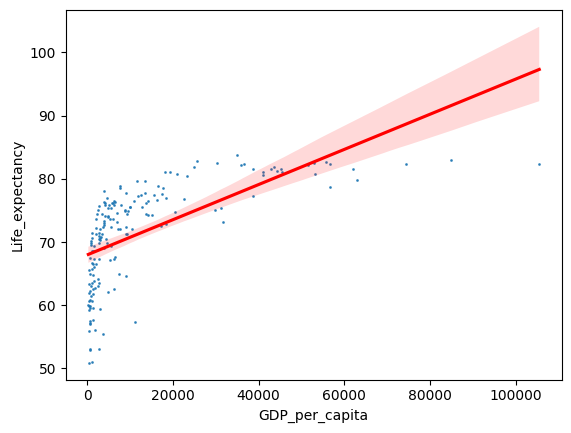

In [7]:
import seaborn
import matplotlib.pyplot as plt

g = seaborn.regplot(data2015, x="GDP_per_capita", y="Life_expectancy", scatter_kws={"s": 1}, line_kws={"color":"r"})
# jak dodat popisek = název grafu? Přes label mi to nefungovalo: label = "Life Expectancy 2015"

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "Life_expectancy ~ GDP_per_capita"
mod = smf.ols(formula=formula, data=data2015)
res = mod.fit()
display(res.summary())

display("Koeficient determinace je R-squared = 0.396, což znamená, že proměnná HDP na hlavu vysvětluje délku života jen ze 40%")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     116.1
Date:                Sat, 27 May 2023   Prob (F-statistic):           3.90e-21
Time:                        14:33:29   Log-Likelihood:                -576.78
No. Observations:                 179   AIC:                             1158.
Df Residuals:                     177   BIC:                             1164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         67.9538      0.561    121.219      0.000      66.848      69.060
GDP_per_capita     0.0003   2.58e-05     10.774      0.000       0.000       0.000
==============================================================================
Omnibus:                       18.171   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.349
Skew:                          -0.846   Prob(JB):                     2.31e-05
Kurtosis:                       3.037   Cond. No.                     2.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

'Koeficient determinace je R-squared = 0.396, což znamená, že proměnná HDP na hlavu vysvětluje délku života jen ze 40%'

C:\Users\zitko\AppData\Local\Temp\ipykernel_13092\285058636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2015["GDP_per_capita_log"] = numpy.log(data2015["GDP_per_capita"])


,Country,GDP_per_capita,GDP_per_capita_log,Life_expectancy
0,Turkiye,11006,9.306196,76.5
1,Spain,25742,10.155879,82.8
6,Russian Federation,9313,9.139167,71.2
27,Cameroon,1383,7.232010,57.6
43,"Gambia, The",661,6.493754,60.9
...,...,...,...,...
2753,Tunisia,4095,8.317522,75.9
2820,"Venezuela, RB",17318,9.759502,72.6
2840,Djibouti,2653,7.883446,64.1
2846,Nicaragua,2050,7.625595,73.6


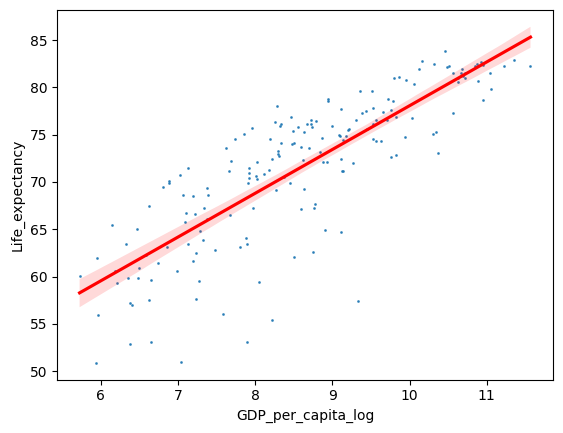

In [12]:
# Protože pro data není vhodné použít linerání regresi (viz body v grafu výše), použiji LOGARITMICKOU TRANSFORMACI na HDP na hlavu (vysvětlující proměnná, osa x)

data2015["GDP_per_capita_log"] = numpy.log(data2015["GDP_per_capita"])
display(data2015[["Country","GDP_per_capita","GDP_per_capita_log","Life_expectancy"]])
g = seaborn.regplot(data2015, x="GDP_per_capita_log", y="Life_expectancy", scatter_kws={"s": 1}, line_kws={"color":"r"})

Dále si zobraz tabulku s využitím metody využitím modulu scipy a metody summary() a zjisti koeficient determinace.

In [15]:
# protože jsem zlogaritmováním HDP na hlavu získala možnost využít graf lineární regrese, postupuji dál ke zjištění normality dat apod.

import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "Life_expectancy ~ GDP_per_capita_log"
mod = smf.ols(formula=formula, data=data2015)
res = mod.fit()
display(res.summary())

display("Koeficient determinace je R-squared = 0.673, což znamená, že proměnná HDP na hlavu vysvětluje délku života jen ze 67%")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     363.8
Date:                Sat, 27 May 2023   Prob (F-statistic):           8.66e-45
Time:                        14:38:32   Log-Likelihood:                -521.96
No. Observations:                 179   AIC:                             1048.
Df Residuals:                     177   BIC:                             1054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             31.8198      2.106     15.112      0.000      27.665      35.975
GDP_per_capita_log     4.6241      0.242     19.072      0.000       4.146       5.103
==============================================================================
Omnibus:                       37.717   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.324
Skew:                          -1.105   Prob(JB):                     7.96e-14
Kurtosis:                       4.789   Cond. No.                         55.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

'Koeficient determinace je R-squared = 0.673, což znamená, že proměnná HDP na hlavu vysvětluje délku života jen ze 67%'

Kvalita a parametry modelu:
- Prob(Omnibus) = 0.000 ... Prob(JB) = 7.96e-14 --> ZAMÍTÁME hypotézu normálního rozdělení reziduí (<0.05).
- R-squared = 0.396 --> Koeficient determinace je R-squared = 0.673, což znamená, že proměnná HDP na hlavu vysvětluje délku života ze 67%.
- Koeficienty "Prob(F-statistic)" a "P>|t|" nemohu využít, protože data nemají normální rozdělení reziduí. To mi znemožňuje tyto koeficienty využít.

Do modelu přidej následující sloupce:

- Schooling - průměrná délka studia (v letech),
- Incidents_HIV - nákazy virem HIV (počet případů na osobu)
- Diphtheria - procento populace očkované proti záškrtu,
- Polio - procento populace očkované proti dětské obrně,
- BMI - průměrný BMI index populace,
- Measles - procento populace očkované proti spalničkám.
U každého sloupce se zamysli nad tím, jestli může délku života výrazně ovlivnit a jaké tipuješ znaménko koeficientu (kladné - zvyšuje délku života, záporné - snižuje délku života).

In [16]:
# metoda nejmenších čtverců (OLS)
formula = "Life_expectancy ~ GDP_per_capita_log + Schooling + Incidents_HIV + Diphtheria + Polio + BMI + Measles"
mod = smf.ols(formula=formula, data=data2015)
res = mod.fit()
display(res.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     120.8
Date:                Sat, 27 May 2023   Prob (F-statistic):           9.01e-63
Time:                        14:39:08   Log-Likelihood:                -462.41
No. Observations:                 179   AIC:                             940.8
Df Residuals:                     171   BIC:                             966.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             28.6562      3.767      7.607      0.000      21.220      36.093
GDP_per_capita_log     2.7827      0.310      8.988      0.000       2.172       3.394
Schooling              0.4397      0.145      3.039      0.003       0.154       0.725
Incidents_HIV         -1.4143      0.155     -9.126      0.000      -1.720      -1.108
Diphtheria            -0.0350      0.046     -0.757      0.450      -0.126       0.056
Polio                  0.1641      0.054      3.040      0.003       0.058       0.271
BMI                    0.1586      0.144      1.103      0.271      -0.125       0.442
Measles                0.0083      0.021      0.405      0.686      -0.032       0.049
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                5.610
Skew:                          -0.413   Prob(JB):                       0.0605
Kurtosis:                       3.265   Cond. No.                     2.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Kvalita a parametry modelu:
- Prob(Omnibus) = 0.050 ... Prob(JB) = 0.0605 --> Nezamítáme hypotézu normálního rozdělení reziduí (>0.05). Můžeme tedy využít další koeficienty.   (lze nezamítnou hypotézu, když má přesně 5%)?????????????
- Prob(F-statistic) = 9.01e-63 --> Model jako celek je statisticky významný (<0.05).
- R-squared = 0.832 --> Model na základě nezávislých proměných vysvětluje 83 % rozptylu závislé proměnné = průměrné délky života (zbytek vzniká faktory mimo model nebo náhodně).
- P>|t|: Statisticky významné pro model jsou proměnné, které mají hodnotu P>|t|  <0.05:

         Statisticky významné proměnné jsou GDP_per_capita_log, Schooling, Incidents_HIV a Polio.  

         (tzn. logaritmus HDP na hlavu, průměrná délka studia, nákazy virem HIV a procento populace očkované proti dětské obrně)

Pokud jsi nezamítl(a) hypotézu normality, podívej se do sloupce P>|t| a vyber řádek s nejvyšší p-hodnotou. Koeficient pro daný řádek odeber z modelu. Jak se změnila hodnota ostatních koeficientů? Jak se změnil koeficient determinace?

In [17]:
# odebrala jsem proměnnou "Measels", protože má hodnotu P>|t| nejvyšší ze všech (0.686). 
formula = "Life_expectancy ~ GDP_per_capita_log + Schooling + Incidents_HIV + Diphtheria + Polio + BMI"
mod = smf.ols(formula=formula, data=data2015)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     141.5
Date:                Sat, 27 May 2023   Prob (F-statistic):           7.86e-64
Time:                        14:46:26   Log-Likelihood:                -462.49
No. Observations:                 179   AIC:                             939.0
Df Residuals:                     172   BIC:                             961.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             28.5933      3.755      7.615      0.000      21.182      36.005
GDP_per_capita_log     2.8054      0.304      9.235      0.000       2.206       3.405
Schooling              0.4446      0.144      3.091      0.002       0.161       0.728
Incidents_HIV         -1.4194      0.154     -9.212      0.000      -1.724      -1.115
Diphtheria            -0.0338      0.046     -0.734      0.464      -0.125       0.057
Polio                  0.1664      0.054      3.107      0.002       0.061       0.272
BMI                    0.1659      0.142      1.166      0.245      -0.115       0.447
==============================================================================
Omnibus:                        5.637   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.250
Skew:                          -0.400   Prob(JB):                       0.0724
Kurtosis:                       3.254   Cond. No.                     1.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Kvalita a parametry modelu:
- Prob(Omnibus) = 0.060 ... Prob(JB) = 0.0724 --> Nezamítáme hypotézu normálního rozdělení reziduí (>0.05). Můžeme tedy použít další statistiky a koeficienty modelu.
- Prob(F-statistic) = 7.86e-64 --> Model jako celek je statisticky významný (<0.05).
- R-squared = 0.832 --> Model na základě nezávislých proměných vysvětluje 83 % rozptylu závislé proměnné = průměrné délky života (zbytek vzniká faktory nezahrnuté v modelu nebo náhodně).
- P>|t|: Statisticky významné pro model jsou proměnné, které mají hodnotu P>|t|  <0.05:

         Statisticky významné proměnné jsou GDP_per_capita_log, Schooling, Incidents_HIV a Polio. Což je stejné, jako v předchozím modelu.

         (tzn. logaritmus HDP na hlavu, průměrná délka studia, nákazy virem HIV a procento populace očkované proti dětské obrně)

Odebráním proměnné "Measles" se nic zásadního nestalo. Znamená to, že očkování proti spalničkám nemá výrazný vliv na průměrnou délku života a nemusí být zahrnuto v modelu.

In [18]:
# odebírám dále a to proměnnou "Diphtheria", protože má hodnotu P>|t| nejvyšší ze všech (0.464). 
formula = "Life_expectancy ~ GDP_per_capita_log + Schooling + Incidents_HIV + Polio + BMI"
mod = smf.ols(formula=formula, data=data2015)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     170.2
Date:                Sat, 27 May 2023   Prob (F-statistic):           7.47e-65
Time:                        14:53:46   Log-Likelihood:                -462.77
No. Observations:                 179   AIC:                             937.5
Df Residuals:                     173   BIC:                             956.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             28.7616      3.743      7.684      0.000      21.374      36.149
GDP_per_capita_log     2.7730      0.300      9.239      0.000       2.181       3.365
Schooling              0.4584      0.142      3.220      0.002       0.177       0.739
Incidents_HIV         -1.4198      0.154     -9.227      0.000      -1.723      -1.116
Polio                  0.1306      0.022      5.955      0.000       0.087       0.174
BMI                    0.1733      0.142      1.223      0.223      -0.106       0.453
==============================================================================
Omnibus:                        6.077   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                5.693
Skew:                          -0.410   Prob(JB):                       0.0580
Kurtosis:                       3.300   Cond. No.                     1.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Kvalita a parametry modelu:
- Prob(Omnibus) = 0.048 ... Prob(JB) = 0.0580 --> ZAMÍTÁME hypotézu normálního rozdělení reziduí (>0.05). Nemohu tedy využít další statistické ukazatele a koeficienty pro získání informací o kvalitě modelu.
- R-squared = 0.831 --> Model na základě nezávislých proměných vysvětluje 83 % rozptylu závislé proměnné = průměrné délky života (zbytek vzniká neznámými faktory nebo náhodně). Lehce se tedy snížilo % vysvětlení závislé proměnné.

Odebráním další proměnné "Measles" data nemají již normální rozdělení. Je vhodné proměnnou "Diphtheria" nechat (procento populace očkované prot záškrtu).

In [19]:
# odebrala jsem dále proměnnou "Schooling" zkušebně
formula = "Life_expectancy ~ GDP_per_capita_log + Incidents_HIV + Diphtheria + Polio + BMI"
mod = smf.ols(formula=formula, data=data2015)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     160.0
Date:                Sat, 27 May 2023   Prob (F-statistic):           6.03e-63
Time:                        14:57:22   Log-Likelihood:                -467.33
No. Observations:                 179   AIC:                             946.7
Df Residuals:                     173   BIC:                             965.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             21.9222      3.148      6.964      0.000      15.709      28.136
GDP_per_capita_log     3.4176      0.236     14.484      0.000       2.952       3.883
Incidents_HIV         -1.4329      0.158     -9.082      0.000      -1.744      -1.121
Diphtheria            -0.0524      0.047     -1.122      0.263      -0.145       0.040
Polio                  0.2026      0.054      3.784      0.000       0.097       0.308
BMI                    0.3064      0.138      2.217      0.028       0.034       0.579
==============================================================================
Omnibus:                        6.909   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                6.623
Skew:                          -0.455   Prob(JB):                       0.0365
Kurtosis:                       3.247   Cond. No.                     1.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# zkušebně jsem odebrala proměnnou "BMI", protože má hodnotu P>|t| = 0.223, což je také nad 0.05 (není tedy pro model statistický významný tento parametr). 
formula = "Life_expectancy ~ GDP_per_capita_log + Schooling + Incidents_HIV + Diphtheria + Polio"
mod = smf.ols(formula=formula, data=data2015)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     169.2
Date:                Sat, 27 May 2023   Prob (F-statistic):           1.12e-64
Time:                        15:01:17   Log-Likelihood:                -463.20
No. Observations:                 179   AIC:                             938.4
Df Residuals:                     173   BIC:                             957.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             32.0286      2.329     13.750      0.000      27.431      36.626
GDP_per_capita_log     2.8558      0.301      9.488      0.000       2.262       3.450
Schooling              0.4981      0.136      3.651      0.000       0.229       0.767
Incidents_HIV         -1.4212      0.154     -9.214      0.000      -1.726      -1.117
Diphtheria            -0.0376      0.046     -0.818      0.414      -0.128       0.053
Polio                  0.1695      0.054      3.164      0.002       0.064       0.275
==============================================================================
Omnibus:                        6.157   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                5.787
Skew:                          -0.392   Prob(JB):                       0.0554
Kurtosis:                       3.403   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Kvalita a parametry modelu:
- Prob(Omnibus) = 0.046 ... Prob(JB) = 0.0554 --> ZAMÍTÁME hypotézu normálního rozdělení reziduí (>0.05). Nemohu tedy využít další statistické ukazatele a koeficienty pro získání informací o kvalitě modelu.
- R-squared = 0.83 --> Model na základě nezávislých proměných vysvětluje 82 % rozptylu závislé proměnné = průměrné délky života (zbytek vzniká faktory nezahrnutými v modelu nebo náhodně). 

Odebráním proměnné "BMI" data nemají již normální rozdělení. Je vhodné proměnnou "BMI" nechat (průměrná délka studia).

### Test normality dat:
Mnoho statistických testů vyžaduje normalitu dat, tj. to, že data mají normální rozdělení. Pro provedení testu použijeme funkci shapiro z modulu scipy.
- zkouším navíc

In [23]:
from scipy import stats

res = stats.shapiro(data2015["Life_expectancy"])      # osa Y (má být zahrnuta proměnná na ose Y)
display(res)

res = stats.shapiro(data2015["GDP_per_capita_log"])   # osa X (zkouším logaritmus HDP na hlavu, který je na ose X)
display(res)

res = stats.shapiro(data2015["GDP_per_capita"])       # osa X (zkouším HDP na hlavu, který je na ose X)
display(res)

ShapiroResult(statistic=0.9528260231018066, pvalue=1.0978403224726208e-05)

ShapiroResult(statistic=0.9816388487815857, pvalue=0.01852857880294323)

ShapiroResult(statistic=0.6861830949783325, pvalue=4.7646682753753776e-18)

Data tedy nemají normální rozdělení (P-value = 1.0978403224726208e-05   --> tzn. menší než 0.05) --> data NEmají normální rozdělení (a nemůžeme na ně použít parametrické testy).

Jak to ale, že podle Prob(Omnibus) je o logaritmické transformaci, že nezamítáme hypotézu normálního rozdělení? Ale přitom data podle testu Shapiro normální rozdělení nemají? Tomuto rozporu moc nerozumím, dokázal bys ho prosím vysvětlit?

Všechny tři hodnoty P-value jsou menší než 0,05 --> data NEmají normální rozdělení